In [1]:
import os
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
print(os.getcwd())

/Users/pawankumarkc/Documents/vscodepython/NLP/Libraries


In [14]:
#dataset = pd.read_csv("Titanic.csv")
dataset = pd.read_excel("Employee_Data.xls")


In [15]:
dataset.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [18]:
#Getting percentage values of missing data
dataset.isnull().sum() / len(dataset)*100

Employee Id     0.0
First Name      0.0
Last Name       0.0
Department     19.0
Age            18.0
Experience     10.0
Salary          0.0
dtype: float64

In [19]:
#How to identify data type for missing variable?
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [21]:
#How many datapoints are given in class "department"
dataset['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [25]:
#Handling char/object missing variable
dataset['Department'] = dataset['Department'].fillna('Sales and Marketing')

In [26]:
dataset['Department'].isna().sum()

0

In [27]:
dataset['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

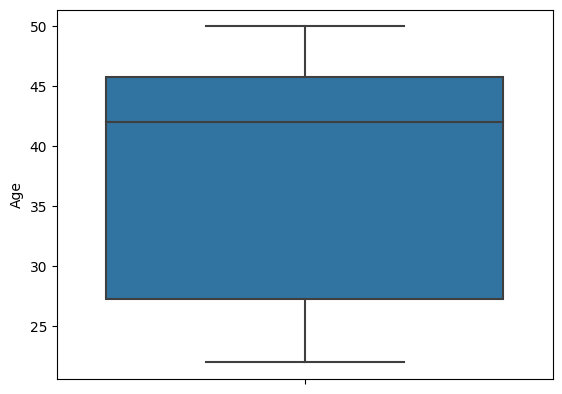

In [28]:
#Check outliers (Age, Experiance)
# 4   Age          82 non-null     float64
# 5   Experience   90 non-null     float64
#Both are numeric value, implementing box plot to check outlier

sns.boxplot(y='Age', data=dataset)
plt.show()

#Age - There are no outliers - Approach - Mean

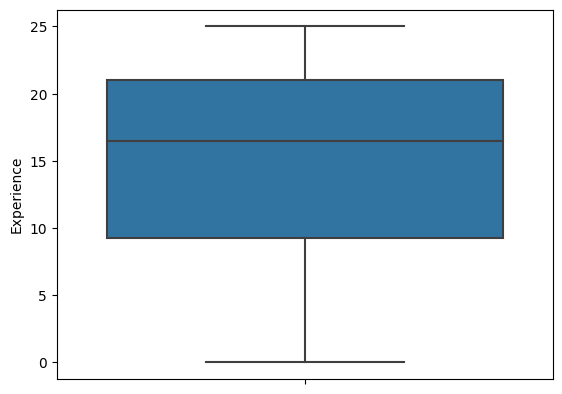

In [30]:
sns.boxplot(y='Experience', data=dataset)
plt.show()

#Experiance - There are no outliers - Approach - Mean

In [31]:
dataset['Age'].mean()

37.97560975609756

In [32]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

In [33]:
dataset['Experience'] = dataset['Experience'].fillna(dataset['Experience'].mean())

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   100 non-null    object 
 4   Age          100 non-null    float64
 5   Experience   100 non-null    float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [35]:
dataset.describe()

,Employee Id,Age,Experience,Salary
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,37.975610,14.766667,65066.760000
std,29.011492,8.606992,6.532050,26189.874212
min,1.000000,22.000000,0.000000,11830.000000
25%,25.750000,30.000000,10.000000,48526.000000
50%,50.500000,39.500000,15.000000,73500.500000
75%,75.250000,44.250000,20.000000,86621.250000
max,100.000000,50.000000,25.000000,98180.000000


Encoding

In [36]:
#part 1 Label encoder 

dataset['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [37]:
dataset['Department'] = dataset['Department'].astype('category')
dataset['Department'] = dataset['Department'].cat.codes

In [38]:
dataset.head(10)

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,2,28.0,3.0,32889
1,2,Sheila,Garza,2,22.0,1.0,15944
2,3,John,Bryant,1,22.0,1.0,40343
3,4,Christian,Farley,1,22.0,1.0,19018
4,5,Colorado,Bowen,0,27.0,0.0,24795
5,6,Elijah,Matthews,0,26.0,5.0,15387
6,7,Bo,Mcleod,1,24.0,6.0,34117
7,8,Zena,Melendez,1,29.0,2.0,16099
8,9,Tucker,Michael,2,29.0,5.0,42105
9,10,Lucas,Rowe,1,30.0,6.0,11891


In [39]:
dataset['Department'].value_counts()

2    49
0    27
1    24
Name: Department, dtype: int64

In [40]:
#Part 2 One hot encoder

dataset = pd.get_dummies(dataset, columns=['Department'])

In [41]:
dataset.head(10)

,Employee Id,First Name,Last Name,Age,Experience,Salary,Department_0,Department_1,Department_2
0,1,Joy,Bass,28.0,3.0,32889,0,0,1
1,2,Sheila,Garza,22.0,1.0,15944,0,0,1
2,3,John,Bryant,22.0,1.0,40343,0,1,0
3,4,Christian,Farley,22.0,1.0,19018,0,1,0
4,5,Colorado,Bowen,27.0,0.0,24795,1,0,0
5,6,Elijah,Matthews,26.0,5.0,15387,1,0,0
6,7,Bo,Mcleod,24.0,6.0,34117,0,1,0
7,8,Zena,Melendez,29.0,2.0,16099,0,1,0
8,9,Tucker,Michael,29.0,5.0,42105,0,0,1
9,10,Lucas,Rowe,30.0,6.0,11891,0,1,0


In [43]:
#Part3: Dummy variable (n-1)

dataset.drop(['Department_0'], axis=1, inplace=True) #Axis=1 means columnwise
dataset.head()

,Employee Id,First Name,Last Name,Age,Experience,Salary,Department_1,Department_2
0,1,Joy,Bass,28.0,3.0,32889,0,1
1,2,Sheila,Garza,22.0,1.0,15944,0,1
2,3,John,Bryant,22.0,1.0,40343,1,0
3,4,Christian,Farley,22.0,1.0,19018,1,0
4,5,Colorado,Bowen,27.0,0.0,24795,0,0
